In [ ]:
# importing required libraries
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importing the dataset
X = pd.DataFrame(fetch_california_housing().data)
y = pd.DataFrame(fetch_california_housing().target)

In [ ]:
# scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X, y)
X = scaled_data[:, 0:8]
y = scaled_data[:, -1]

In [ ]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# building a regression MLP using the sequential API
regression_mlp = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=8),
                                      tf.keras.layers.Dense(30, activation="relu"),
                                      tf.keras.layers.Dense(1, activation="linear")])
regression_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model
regression_mlp.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.MeanSquaredError()])
batch_size = 32
epochs = 20

history = regression_mlp.fit(X_train, y_train, batch_size, epochs, validation_split=0.3)

Epoch 1/20
362/362 [==============================] - 2s 4ms/step - loss: 0.1833 - mean_squared_error: 0.1833 - val_loss: 0.0928 - val_mean_squared_error: 0.0928
Epoch 2/20
362/362 [==============================] - 1s 3ms/step - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 3/20
362/362 [==============================] - 2s 5ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 4/20
362/362 [==============================] - 2s 6ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 5/20
362/362 [==============================] - 2s 6ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 6/20
362/362 [==============================] - 2s 5ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7/20
362/362 [========

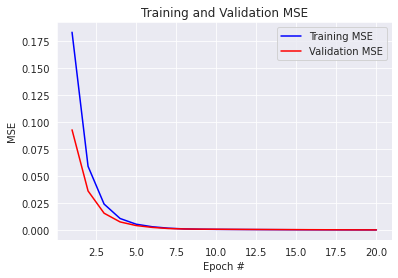

In [ ]:
# visualising the MSE
sns.set_style("darkgrid")
 
# get the details form the history object
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.xlabel('Epoch #')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.legend()

plt.show()

In [ ]:
# testing the model
regression_mlp.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 1.2180e-04 - mean_squared_error: 1.2180e-04


[0.00012179975601611659, 0.00012179975601611659]

The MSE is very low due to this being a benchmark dataset.

In [ ]:
# splitting the features for the wide network and deep network
inputA = X_train[:, 0:4]
inputB = X_train[:, 2:7]

In [ ]:
# building a wide and deep neural network using the functional API
input1 = tf.keras.layers.Input(shape=4)
input2 = tf.keras.layers.Input(shape=5)

Y = tf.keras.layers.Dense(30, activation="relu")(input2)
Y = tf.keras.layers.Dense(30, activation="relu")(Y)
Y = tf.keras.layers.Concatenate(axis=1)([input1, Y])
outputs = tf.keras.layers.Dense(1, activation="linear")(Y)
wide_and_deep_model = tf.keras.Model(inputs=[input1, input2], outputs=outputs)
wide_and_deep_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           180         ['input_3[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                              

In [ ]:
# training the model
wide_and_deep_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.MeanSquaredError()])
batch_size = 32
epochs = 20

history = wide_and_deep_model.fit([inputA, inputB], y_train, batch_size, epochs, validation_split=0.3)

Epoch 1/20
362/362 [==============================] - 2s 4ms/step - loss: 0.1537 - mean_squared_error: 0.1537 - val_loss: 0.0797 - val_mean_squared_error: 0.0797
Epoch 2/20
362/362 [==============================] - 1s 3ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 3/20
362/362 [==============================] - 1s 3ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 4/20
362/362 [==============================] - 1s 3ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 5/20
362/362 [==============================] - 1s 3ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 6/20
362/362 [==============================] - 1s 3ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 7/20
362/362 [========

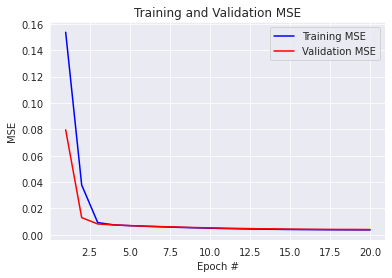

In [ ]:
# visualising the MSE
sns.set_style("darkgrid")
 
# get the details form the history object
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.xlabel('Epoch #')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.legend()

plt.show()

In [ ]:
# testing the model
wide_and_deep_model.evaluate([X_test[:, 0:4], X_test[:, 2:7]], y_test) 

129/129 [==============================] - 0s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036


[0.0035786363296210766, 0.0035786363296210766]

The MSE is low, but not as low as the regression MLP as the dataset here is not large enough to properly optimize the model.